# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [140]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [141]:
# Display a description of the dataset
display(data.describe())

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [142]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [20, 150, 439]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

print "Difference from Mean: "
display(samples - np.round(data.mean()))
print "Difference from Median: "
display(samples - np.round(data.median()))

Chosen samples of wholesale customers dataset:


Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  17546  4519     4602    1066              2259          2124
1  16225  1825     1765     853               170          1067
2   2787  1698     2510      65               477            52

Difference from Mean: 


Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  5546.0 -1277.0  -3349.0 -2006.0            -622.0         599.0
1  4225.0 -3971.0  -6186.0 -2219.0           -2711.0        -458.0
2 -9213.0 -4098.0  -5441.0 -3007.0           -2404.0       -1473.0

Difference from Median: 


Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  9042.0   892.0   -154.0  -460.0            1443.0        1158.0
1  7721.0 -1802.0  -2991.0  -673.0            -646.0         101.0
2 -5717.0 -1929.0  -2246.0 -1461.0            -339.0        -914.0

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

We consider the difference from the median for this question as the mean is highly affected by outliers.

The first customer seems to purchase much higher than median Fresh items, Detergents_Paper and Delicatessen, higher than median Milk and lower than median Grocery and Frozen items.Even though Grocery purchase is lower than median, it is quite close (only 154 lower) to the median. Since there is a wide variety of products that this customer requires, this order seems to be a purchase requisition from a Super Market.

The second chosen customer seems to be a business that focuses on retailing of Fresh food like fruits and Delicatessen products as these values are higher than the median. The customer also purchases milk, grocery, frozen and detergents_paper products but the percentage of Fresh food and frozen food seems higher.

The third selected customer seems to be involved in the cafe business. Although the values of all product categories are lower than the median, we can make a comparison between the product categories. There seems to be a significant requirement for milk and grocery as these would be required to prepare food and beverages in the cafe, but relatively lower requirement for fresh food, frozen food and delicatessen. There also seems to be a considerable requirement for detergents and paper which makes sense as there would be a lot of cleaning (of tables) involved in the cafe.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [143]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
rem_feature = 'Delicatessen'
new_data = data.drop(rem_feature,axis=1)

from sklearn.cross_validation import train_test_split
# TODO: Split the data into training and testing sets using the given feature as the target
tgt = data[rem_feature]
X_train, X_test, y_train, y_test = train_test_split(new_data, tgt, test_size=0.25, random_state=1)

from sklearn.tree import DecisionTreeRegressor
# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(min_samples_split=5,random_state=1)
regressor.fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test,y_test)
print "The score is: {}".format(score)

The score is: -3.76923537889


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** 

The feature that was predicted was 'Delicatessen'. A Decision tree regressor with a min_samples_split = 5 was trained. The reported score obtained with the removal of Delicatessen was -3.77 which is a poor result. As mentioned in the hint, a negative R^2 score implies failure of the model to fit the data. This shows that using the other features, it is difficult to predict the value for the 'Delicatessen' feature accurately which means that Delicatessen is in a sense, an independent feature. Hence, Delicatessen seems like a crucial feature which would help in separating the data. Hence, this feature is necessary for identifying customers' spending habits.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

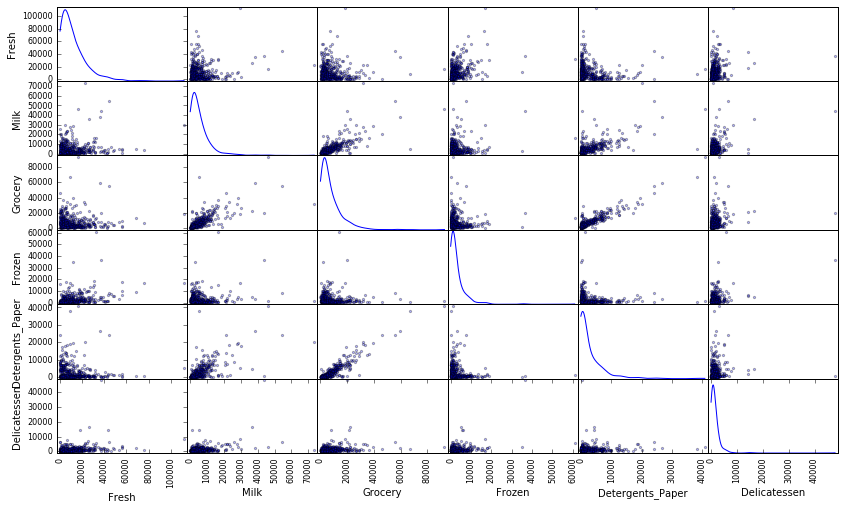

In [144]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

Feature pairs like (Milk, Grocery), (Milk, Detergents_Paper), (Grocery, Detergents_Paper) seem to have a positive correlation.

However, there does not seem to be significant correlation between Delicatessen and any of the other features. Hence, this supports the reasoning in Question 2 that Delicatessen is a crucial feature that separates the data. 

Considering any of the 6 features alone, it looks like a highly right-skewed normal distribution.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

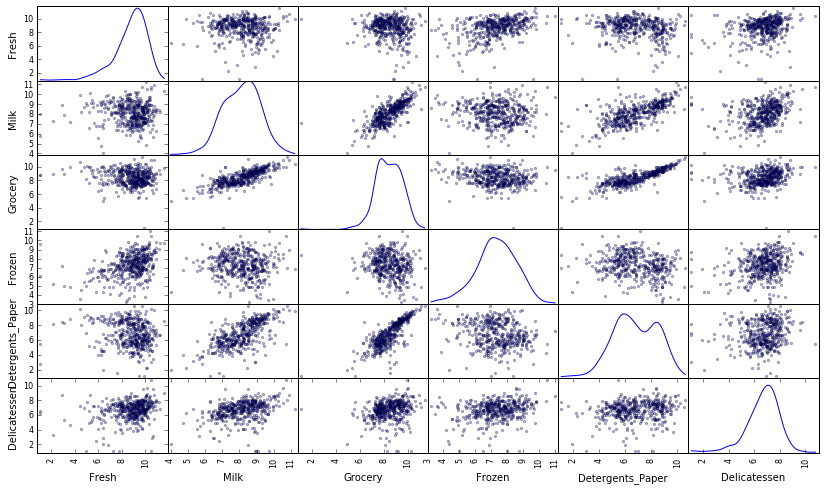

In [145]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [146]:
# Display the log-transformed sample data
display(log_samples)

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0  9.772581  8.416046  8.434246  6.971669          7.722678      7.661056
1  9.694309  7.509335  7.475906  6.748760          5.135798      6.972606
2  7.932721  7.437206  7.828038  4.174387          6.167516      3.951244

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [147]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [154,65,75,66,128]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)


Data points considered outliers for the feature 'Fresh':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.442651   9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225   7.335634   8.911530  5.164786          8.151333      3.295837
81   5.389072   9.163249   9.575192  5.645447          8.964184      5.049856
95   1.098612   7.979339   8.740657  6.086775          5.407172      6.563856
96   3.135494   7.869402   9.001839  4.976734          8.262043      5.379897
128  4.941642   9.087834   8.248791  4.955827          6.967909      1.098612
171  5.298317  10.160530   9.894245  6.478510          9.079434      8.740337
193  5.192957   8.156223   9.917982  6.865891          8.633731      6.501290
218  2.890372   8.923191   9.629380  7.158514          8.475746      8.759669
304  5.081404   8.917311  10.117510  6.424869          9.374413      7.787382
305  5.493061   9.468001   9.088399  6.683361          8.271037      5.351858
338  1.098612   5.808142   8.856661  9.655090          2.708050      6.309918
353  4.762174   8.742574   9.961898  5.429346          9.069007      7.013016
355  5.247024   6.588926   7.606885  5.501258          5.214936      4.844187
357  3.610918   7.150701  10.011086  4.919981          8.816853      4.700480
412  4.574711   8.190077   9.425452  4.584967          7.996317      4.127134

Data points considered outliers for the feature 'Milk':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
86   10.039983  11.205013  10.377047  6.894670          9.906981      6.805723
98    6.220590   4.718499   6.656727  6.796824          4.025352      4.882802
154   6.432940   4.007333   4.919981  4.317488          1.945910      2.079442
356  10.029503   4.897840   5.384495  8.057377          2.197225      6.306275

Data points considered outliers for the feature 'Grocery':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
154  6.432940  4.007333  4.919981  4.317488          1.945910      2.079442

Data points considered outliers for the feature 'Frozen':


Fresh      Milk    Grocery     Frozen  Detergents_Paper  Delicatessen
38    8.431853  9.663261   9.723703   3.496508          8.847360      6.070738
57    8.597297  9.203618   9.257892   3.637586          8.932213      7.156177
65    4.442651  9.950323  10.732651   3.583519         10.095388      7.260523
145  10.000569  9.034080  10.457143   3.737670          9.440738      8.396155
175   7.759187  8.967632   9.382106   3.951244          8.341887      7.436617
264   6.978214  9.177714   9.645041   4.110874          8.696176      7.142827
325  10.395650  9.728181   9.519735  11.016479          7.148346      8.632128
420   8.402007  8.569026   9.490015   3.218876          8.827321      7.239215
429   9.060331  7.467371   8.183118   3.850148          4.430817      7.824446
439   7.932721  7.437206   7.828038   4.174387          6.167516      3.951244

Data points considered outliers for the feature 'Detergents_Paper':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
161  9.428190  6.291569  5.645447  6.995766          1.098612      7.711101

Data points considered outliers for the feature 'Delicatessen':


Fresh       Milk    Grocery     Frozen  Detergents_Paper  \
66    2.197225   7.335634   8.911530   5.164786          8.151333   
109   7.248504   9.724899  10.274568   6.511745          6.728629   
128   4.941642   9.087834   8.248791   4.955827          6.967909   
137   8.034955   8.997147   9.021840   6.493754          6.580639   
142  10.519646   8.875147   9.018332   8.004700          2.995732   
154   6.432940   4.007333   4.919981   4.317488          1.945910   
183  10.514529  10.690808   9.911952  10.505999          5.476464   
184   5.789960   6.822197   8.457443   4.304065          5.811141   
187   7.798933   8.987447   9.192075   8.743372          8.148735   
203   6.368187   6.529419   7.703459   6.150603          6.860664   
233   6.871091   8.513988   8.106515   6.842683          6.013715   
285  10.602965   6.461468   8.188689   6.948897          6.077642   
289  10.663966   5.655992   6.154858   7.235619          3.465736   
343   7.431892   8.848509  10.177932   7.283448          9.646593   

     Delicatessen  
66       3.295837  
109      1.098612  
128      1.098612  
137      3.583519  
142      1.098612  
154      2.079442  
183     10.777768  
184      2.397895  
187      1.098612  
203      2.890372  
233      1.945910  
285      2.890372  
289      3.091042  
343      3.610918

### Question 4
*Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

There are data points which have been considered as outliers for more than one feature. The data point with index 154 has been labeled as an outlier for three features - Milk, Grocery and Delicatessen. This indicates that this is not some noise that has creeped into the data. Noise would generally have a high value for a single feature. However, even though it is not noise, it is still an outlier and hence, can be removed to obtain a less-skewed distribution.

Similarly, data point with index=65 is an outlier for Fresh and Frozen features. 

Data point with index=75 is an outlier for both Grocery and Detergents_Paper.

Data point with index=66 is an outlier for both Fresh and Delicatessen.

Data point with index=128 is an outlier for both Fresh and Delicatessen.

The five elements in the outliers list are the data points with indices as mentioned above for the reason as previously discussed. Once these points are removed, the mean would better represent the data than with those elements (outliers) in the dataset.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

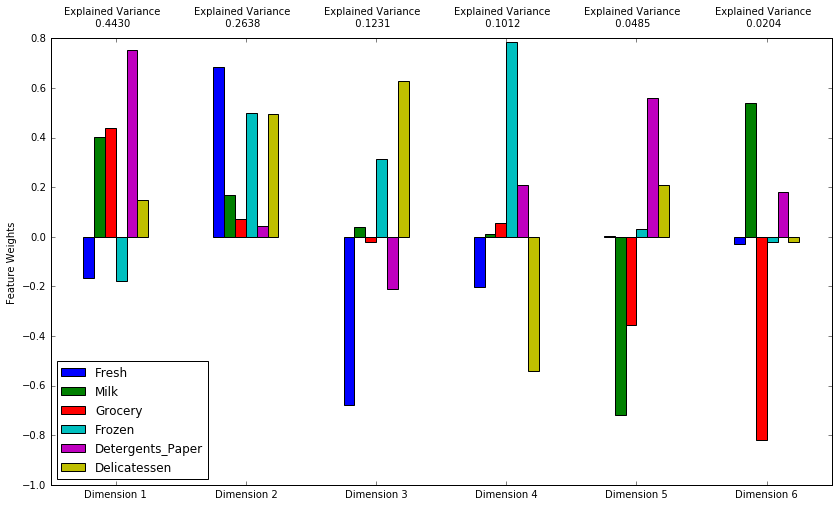

In [148]:
from sklearn.decomposition import PCA
# TODO: Apply PCA to the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

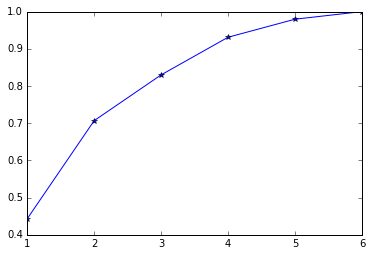

In [149]:
import matplotlib.pyplot as plt
%matplotlib inline
x = np.arange(1, 7)
plt.plot(x, np.cumsum(pca.explained_variance_ratio_), '-*')

This visualization shows the cumulative sum of the explained variance as we add more dimensions. When only one dimension is considered, around 44.3% of the variance is explained by that one dimension. When two dimensions are considered, approximately 70.7% of the variance is explained. When all 6 dimensions are considered, 100% of the variance is explained, as expected.

**Answer:**

About 70.68% of the variance is explained by the first and second principal component. Using the first four components, around 93.11% of the variance is explained.

Each dimension can be thought of as a liking / disliking factor for a particular set of products. A high positive weight indicates strong liking for that category and a high negative weight indicates strong disliking.

The first PC shows a strong correlation between Milk, Grocery and Detergents_Paper with significantly positive weights, while Fresh and Frozen have negative weights. This means that the value for the first PC (dimension) will increase significantly with increase in values for Milk, Grocery and/or Detergents_Paper while the value will decrease with increase in Fresh or Frozen items. This indicates that a customer with a high value for the first dimension is more likely to purchase Milk, Grocery and Detergents_Paper and is less likely to buy Fresh, Frozen or Delicatessen items.

Based on similar reasoning, a customer with a high value for the second dimension (PC) is more likely to purchase Fresh, Frozen and/or Delicatessen while he/she is not as likely to buy Milk, Grocery or Detergents_Paper. In this case however, none of the weights are negative and hence, even though the weights for the latter three categories are small, if the customer purchases any of those items, the value for the second dimension is still going to increase and not decrease as in the first dimension althought the increase would be quite small.

A customer with a high value for the third PC is almost unlikely to buy Fresh items. He/she is more likely to buy Frozen or Delicatessen items. Detergents_Paper also has a negative weight and hence, purchasing these is quite less likely. Milk and Grocery have almost no effecton this dimension.

A high value for the fourth dimension implies a behavior of the customer which indicates a liking towards Frozen and Detergents_Paper. Purchasing Delicatessen would be quite unlikely given that the customer has a high value for the fourth PC and purchasing Fresh items is less likely. Grocery has a small positive weight which means that buying it would increase the value in this dimension but the increase would not be very significant.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [150]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0       0.8375       1.0765      -0.3684      -0.8111       0.5111   
1      -1.9406       0.2418      -0.2884      -1.2041      -0.0917   
2      -0.7390      -3.6914      -2.0335      -0.9927      -0.3109   

   Dimension 6  
0       0.3040  
1       0.1492  
2       0.1734

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [151]:
# TODO: Fit PCA to the good data using only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Apply a PCA transformation the good data
reduced_data = pca.transform(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [152]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0       0.8375       1.0765
1      -1.9406       0.2418
2      -0.7390      -3.6914

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

The K-Means clustering algorithm is fast, simple and scalable. It has only one parameter that is required to be specified - the number of clusters in the data. Each point is assigned to a particular cluster with full certainty in K-Means.

The Gaussian Mixture Model implements the Expectation Maximization method for clustering data points. The major advantage of the GMM Clustering is the fact that it allows for probabilistic, soft-clustering which means that a data point can be shared by more than one cluster. Each data point is assigned with a probability that it belongs to a cluster.

In effect, KMeans scores in speed while GMM scores in structure (soft-clustering).

Given that we will be using only 2 dimensions for clustering which explain 71.55% of the variance, we still have around 28.45% variance left to explain which means that the data is not as separated as possible (which would mean using all dimensions). Hence it makes more sense to be a little uncertain about the points near the boundary of the clusters. This uncertainty cannot be given by K-Means. However, the EM algorithm (Gaussian Mixture Model) does support uncertainty as each data point is assigned with a probability of belonging to a cluster. Hence, choosing the Gaussian Mixture Model for clustering makes more sense in this case.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [153]:
from sklearn.mixture import GMM
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = GMM(n_components=2, random_state=1)
clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

from sklearn.metrics import silhouette_score
# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data,preds,random_state=1)
print "Silhouette score for n_components = 2: {}".format(score)

for i in range(3,7):
    clusterer_tmp = GMM(n_components = i,random_state=1)
    clusterer_tmp.fit(reduced_data)
    preds_tmp = clusterer_tmp.predict(reduced_data)
    score_tmp = silhouette_score(reduced_data,preds_tmp,random_state=1)
    print "Silhouette score for n_components = {}: {}".format(i,score_tmp)

Silhouette score for n_components = 2: 0.411818864386
Silhouette score for n_components = 3: 0.376166165091
Silhouette score for n_components = 4: 0.332470648079
Silhouette score for n_components = 5: 0.277006754052
Silhouette score for n_components = 6: 0.28739910844


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

| n_components 	|  score 	|
|:------------:	|:------:	|
|       **2**      	| **0.4118** 	|
|       3      	| 0.3762	|
|       4      	| 0.3325 	|
|       5      	| 0.2770 	|
|       6      	| 0.2874 	|

**Answer:**

The table above shows the variation of the silhouette score with increase in number of components (clusters). We see that the maximum silhouette score occurs for n_components = 2.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

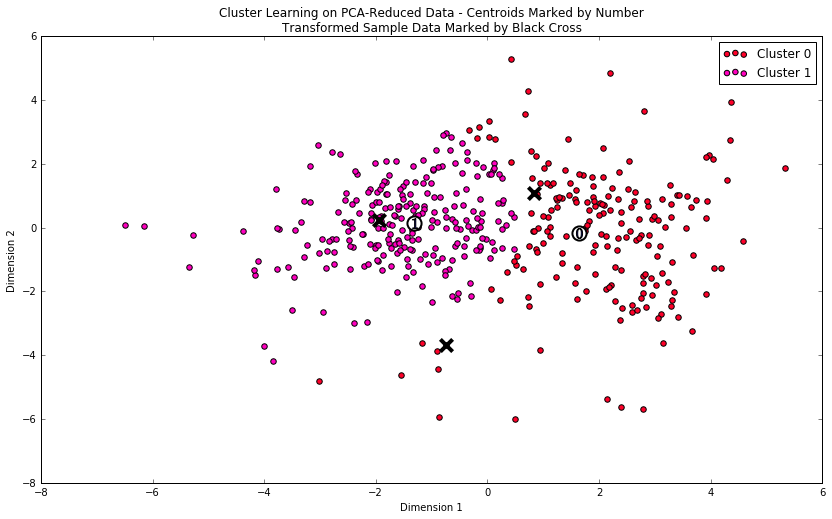

In [154]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0  4316.0  6347.0   9555.0  1036.0            3046.0         945.0
Segment 1  8812.0  2052.0   2689.0  2058.0             337.0         712.0

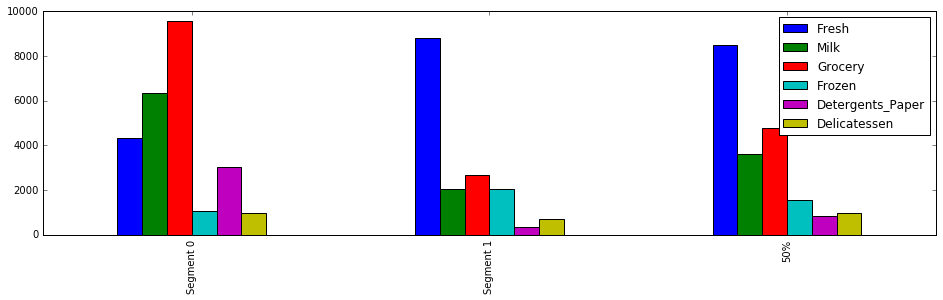

In [155]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

true_centers = true_centers.append(data.describe().ix['50%'])
true_centers.plot(kind = 'bar', figsize = (16, 4))

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

It is surprising to see that the score is maximum for two clusters. Hence, there seems to be only two customer segments in the data. The relation between the PCA dimensions and the centers of the two segments is evident. For example, if we consider the center of Segment 0, we see that it has values higher than the median for Milk, Grocery and Detergents_Paper. This is also clear from the bar chart above. "Dimension 1" from the chart from block 148 (Question 5) shows exactly that. Hence, the points in Segment 0 have high values in Dimension 1 as seen from the clustered chart above (block 154). The center of Segment 1 has values much lower than the median for Milk, Grocery and Detergents_Paper which has thus resulted in low values for Dimension 1 as seen in the clustered data points chart (block 154). The data points are hence split along dimension 1.

Based on the higher than median values for Milk, Grocery and Detergents_Paper, Segment 0 most likely represents Super markets or Retailers while Segment 1 most likely represents Restaurants or Cafes given that they purchase lower than median quantities of Milk, Grocery and Detergents_Paper and higher than median quantities of Fresh and Frozen products.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [156]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


In [157]:
for i,j in enumerate(pca_samples):
    print "Probability of Sample {}: {}".format(i,clusterer.predict_proba([j]))

Probability of Sample 0: [[ 0.55503174  0.44496826]]
Probability of Sample 1: [[ 0.04090493  0.95909507]]
Probability of Sample 2: [[ 0.79211916  0.20788084]]


**Answer:**

Sample point 0 is best represented by Segment 0 - Super Markets. This sample point has high values for Milk, Grocery and Detergents_Paper and has hence been segmented as Segment 0. This is also consistent with the intuitive guess in Question 1. However, it is pretty close to the boundary of separation between segments 0 and 1 and hence, there is quite a lot of uncertainty in the prediction as seen from the probability values above for Sample 0.

Sample point 1 is best represented by Segment 1 - Restaurants. This sample point has relatively lower values for Milk, Grocery and Detergents_Paper and has hence been segmented as Segment 1. This point was intuitively thought to be data from a retailer. However, the probability of belonging to Segment 1 seems very high since the point is very close to the center of cluster (segment) 1.

Sample point 2 lies in the region belonging to Segment 0 - Small Retailer. It has relatively high values for Fresh, Grocery and Detergents_Paper. This point was initially thought to belong to a cafe. However, GMM puts this point into Segment 0. Although the values for Milk, Frozen and Delicatessen are quite low, the highly positive weights for Grocery and Detergents_Paper helps the algorithm cluster this sample into Segment 0 with quite a high probability.

The predictions overall are consistent with the algorithm's solution as described above in the case of each sample point.

## Conclusion

### Question 10
*Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services. If the wholesale distributor wanted to change its delivery service from 5 days a week to 3 days a week, how would you use the structure of the data to help them decide on a group of customers to test?*  
**Hint:** Would such a change in the delivery service affect all customers equally? How could the distributor identify who it affects the most?

**Answer:**

A/B tests usually involve giving one set of customers a particular product/service variant "A" and another set of customers a different variant "B" to see which of the two variants work for each set of customer. 

In our case, let us first consider only one cluster. We can take half of the customers in this cluster and assign them to the 3 days-a-week delivery system and continue with the 5 days-a-week delivery system for the remaining half. A delivery service rating (1-5; 1 being poor and 5 being awesome) can be collected from every customer in each subset. If the average rating of the half with the 3 days-a-week delivery system is higher, then we can implement the 3 days-a-week delivery system throughout this cluster. The same can be done with customers in the other cluster.

One important thing to note is that while selecting customers of one of the two types, it might be important to pick customers who are far from the boundary of the clusters.

### Question 11
*Assume the wholesale distributor wanted to predict a new feature for each customer based on the purchasing information available. How could the wholesale distributor use the structure of the data to assist a supervised learning analysis?*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

**Answer:**

Since we now know the cluster to which each customer belongs to, this can be used as an additional feature for any further supervised learning tasks. The new feature added would be "Customer_Type" which is a binary variable which has a value of 1 if the customer is more likely a Super Market / Retailer and has a value of 0 if the customer is more likely a Restaurant or Cafe.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

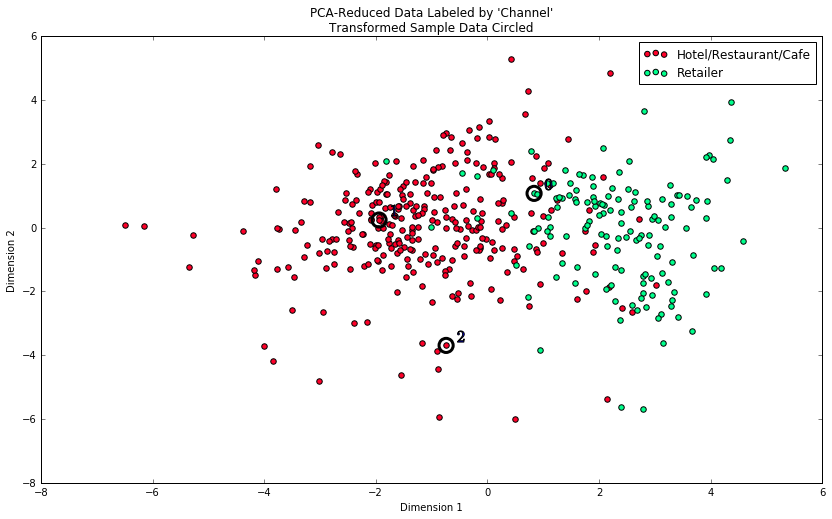

In [158]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

The number of clusters is 2 which is consistent with the GMM's result as obtained previously. 

Yes, there are a few customers who lie very close to the cluster centers and these would be classified as "almost purely" Retailers or Restaurants by this distribution, for example sample 1 which is very close to the center of cluster 0 is almost purely and most certainly a Restaurant.

The distribution also looks quite consistent as Sample 0 is near the boundary of the clusters as with the previous case. Sample 1 is close to cluster 1's center. There is one difference - Sample 2 has been clustered into Segment 1 (Restaurants) while in the GMM approach taken, the sample was clustered into Segment 0.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.